In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [140]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [142]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [143]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [145]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [146]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20


<h2>1) 2-Hidden layer architecture (784-364-174-10 architecture)</h2>


<h2>1.1 MLP + ReLU Activation + ADAM Optimizer</h2>



In [149]:
model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(174, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history11 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_65 (Dense)             (None, 174)               63510     
_________________________________________________________________
dense_66 (Dense)             (None, 10)                1750      
Total params: 351,000
Trainable params: 351,000
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2437 - acc: 0.9279 - val_loss: 0.1265 - val_acc: 0.9615
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0906 - acc: 0.9729 - val_loss: 0.0848 - val_acc: 0.9744
Epoch 3/20
60000/60000 [==============================] - 7s 112us/s

Test score: 0.08348324791224636
Test accuracy: 0.9805


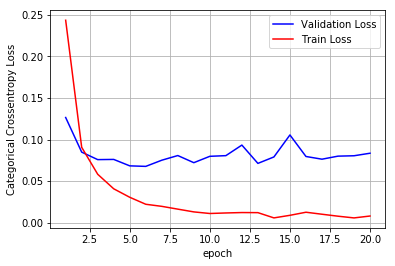

In [150]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score1=score[0]
score2=score[1]
train_acc1=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax11 = plt.subplots(1,1)
ax11.set_xlabel('epoch') ; ax11.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy11 = history11.history['val_loss']
ty11 = history11.history['loss']
plt_dynamic(x, vy11, ty11, ax11)

<h2>1.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer</h2>

In [151]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', 
                      input_shape=(input_dim,),
                      kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(174, activation='relu', 
                      kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_31 (Batc (None, 364)               1456      
_________________________________________________________________
dense_68 (Dense)             (None, 174)               63510     
_________________________________________________________________
batch_normalization_32 (Batc (None, 174)               696       
_________________________________________________________________
dense_69 (Dense)             (None, 10)                1750      
Total params: 353,152
Trainable params: 352,076
Non-trainable params: 1,076
_________________________________________________________________


In [152]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history12 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.2025 - acc: 0.9393 - val_loss: 0.1062 - val_acc: 0.9657
Epoch 2/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0750 - acc: 0.9773 - val_loss: 0.0899 - val_acc: 0.9728
Epoch 3/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0482 - acc: 0.9851 - val_loss: 0.0849 - val_acc: 0.9737
Epoch 4/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0339 - acc: 0.9894 - val_loss: 0.0739 - val_acc: 0.9776
Epoch 5/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0266 - acc: 0.9911 - val_loss: 0.0783 - val_acc: 0.9779
Epoch 6/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0211 - acc: 0.9933 - val_loss: 0.0786 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0202 - acc: 0.9932 - val_loss: 0.0793 -

Test score: 0.08622472910828928
Test accuracy: 0.9795


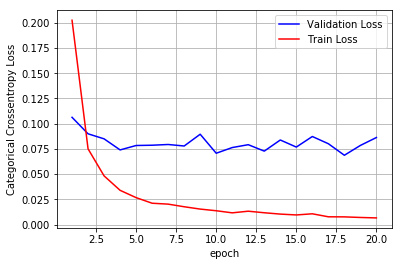

In [153]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
score3=score[0]
score4=score[1]
train_acc2=history11.history['acc']

fig,ax12 = plt.subplots(1,1)
ax12.set_xlabel('epoch') ; ax12.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy12 = history12.history['val_loss']
ty12 = history12.history['loss']
plt_dynamic(x, vy12, ty12, ax12)

<h2>1.3 MLP + Dropout + AdamOptimizer</h2>

In [154]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu',
                     input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(174, activation='relu',
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_33 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_16 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 174)               63510     
_________________________________________________________________
batch_normalization_34 (Batc (None, 174)               696       
_________________________________________________________________
dropout_17 (Dropout)         (None, 174)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 10)                1750      
Total para

In [155]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history13 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.4532 - acc: 0.8635 - val_loss: 0.1638 - val_acc: 0.9506
Epoch 2/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.2178 - acc: 0.9350 - val_loss: 0.1090 - val_acc: 0.9662
Epoch 3/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.1707 - acc: 0.9484 - val_loss: 0.0988 - val_acc: 0.9691
Epoch 4/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.1467 - acc: 0.9549 - val_loss: 0.0890 - val_acc: 0.9721
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1326 - acc: 0.9588 - val_loss: 0.0789 - val_acc: 0.9751
Epoch 6/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1168 - acc: 0.9646 - val_loss: 0.0750 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.1082 - acc: 0.9668 - val_loss: 0.0667 -

Test score: 0.056475996556773315
Test accuracy: 0.9831


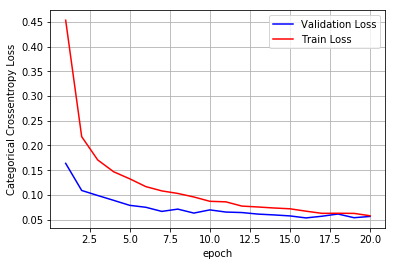

In [156]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
score5=score[0]
score6=score[1]
train_acc3=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax13 = plt.subplots(1,1)
ax13.set_xlabel('epoch') ; ax13.set_ylabel('Categorical Crossentropy Loss')

vy13 = history13.history['val_loss']
ty13 = history13.history['loss']
plt_dynamic(x, vy13, ty13, ax13)


<h2>2) 3-Hidden layer architecture (784-374-140-114-10 architecture)</h2>

<h2>2.1 MLP + ReLU activation + ADAM Optimizer</h2>

In [157]:
model_relu = Sequential()
model_relu.add(Dense(374, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(140, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(114, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history21 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 374)               293590    
_________________________________________________________________
dense_74 (Dense)             (None, 140)               52500     
_________________________________________________________________
dense_75 (Dense)             (None, 114)               16074     
_________________________________________________________________
dense_76 (Dense)             (None, 10)                1150      
Total params: 363,314
Trainable params: 363,314
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.2440 - acc: 0.9285 - val_loss: 0.1092 - val_acc: 0.9663
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - 

Test score: 0.10880283313435166
Test accuracy: 0.9786


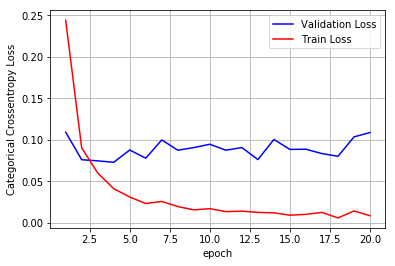

In [158]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score7=score[0]
score8=score[1]
train_acc4=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax21 = plt.subplots(1,1)
ax21.set_xlabel('epoch') ; ax21.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy21 = history21.history['val_loss']
ty21 = history21.history['loss']
plt_dynamic(x, vy21, ty21, ax21)

<h2>2.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer</h2>

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(374, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(140, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(114, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [160]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history22 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.4999 - acc: 0.8503 - val_loss: 3.8705 - val_acc: 0.4515
Epoch 2/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.3057 - acc: 0.9126 - val_loss: 0.5833 - val_acc: 0.8581
Epoch 3/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.2872 - acc: 0.9178 - val_loss: 3.8988 - val_acc: 0.5002
Epoch 4/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.2792 - acc: 0.9208 - val_loss: 1.7993 - val_acc: 0.6134
Epoch 5/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.2721 - acc: 0.9232 - val_loss: 0.9218 - val_acc: 0.7855
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2684 - acc: 0.9244 - val_loss: 4.0124 - val_acc: 0.3820
Epoch 7/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.2663 - acc: 0.9249 - val_loss: 3.5114 -

In [161]:
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_35 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_36 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_37 (Batc (None, 784)               3136      
_________________________________________________________________
dense_80 (Dense)             (None, 10)                7850      
Total params: 17,258
Trainable params: 12,554
Non-trainable params: 4,704
_________________________________________________________________


Test score: 0.6937280797123909
Test accuracy: 0.8416


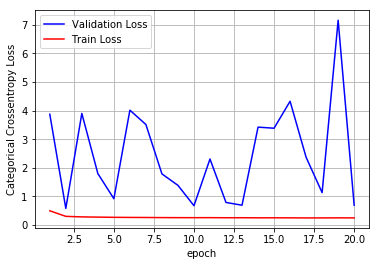

In [162]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
score9=score[0]
score10=score[1]
train_acc5=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax22 = plt.subplots(1,1)
ax22.set_xlabel('epoch') ; ax22.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy22 = history22.history['val_loss']
ty22 = history22.history['loss']
plt_dynamic(x, vy22, ty22, ax22)

<h2>2.3 MLP + Dropout + AdamOptimizer</h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(374, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))

model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(140, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

                                                    
model_relu.add(Dense(114, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [164]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history23 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 230us/step - loss: 1.3548 - acc: 0.5674 - val_loss: 0.4997 - val_acc: 0.8810
Epoch 2/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.8594 - acc: 0.7203 - val_loss: 0.4482 - val_acc: 0.8865
Epoch 3/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.8360 - acc: 0.7286 - val_loss: 0.4370 - val_acc: 0.8915
Epoch 4/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.8291 - acc: 0.7310 - val_loss: 0.4213 - val_acc: 0.8924
Epoch 5/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.8298 - acc: 0.7300 - val_loss: 0.4286 - val_acc: 0.8941
Epoch 6/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.8273 - acc: 0.7303 - val_loss: 0.4214 - val_acc: 0.8962
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.8294 - acc: 0.7310 - val_loss: 0.4173 -

In [165]:
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_38 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_18 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_19 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_20 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 10)                7850      
Total para

Test score: 0.4045674772977829
Test accuracy: 0.8989


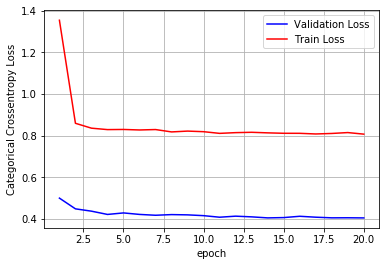

In [166]:
score = model_drop.evaluate(X_test, Y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy23 = history23.history['val_loss']
ty23 = history23.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

<h2>3) 5-Hidden layer architecture (784-270-170-124-74-24-10 architecture)</h2>

<h2>3.1 MLP + ReLU activation + ADAM Optimizer</h2>

> Indented block



In [167]:
model_relu = Sequential()
model_relu.add(Dense(270, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(74, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(24, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history31 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 270)               211950    
_________________________________________________________________
dense_86 (Dense)             (None, 170)               46070     
_________________________________________________________________
dense_87 (Dense)             (None, 124)               21204     
_________________________________________________________________
dense_88 (Dense)             (None, 74)                9250      
_________________________________________________________________
dense_89 (Dense)             (None, 24)                1800      
_________________________________________________________________
dense_90 (Dense)             (None, 10)                250       
Total params: 290,524
Trainable params: 290,524
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.08955217869340677
Test accuracy: 0.9831


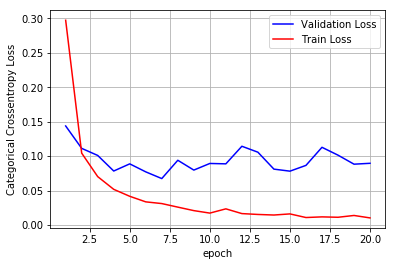

In [168]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score13=score[0]
score14=score[1]
train_acc7=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax31 = plt.subplots(1,1)
ax31.set_xlabel('epoch') ; ax31.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy31 = history31.history['val_loss']
ty31 = history31.history['loss']
plt_dynamic(x, vy31, ty31, ax31)

<h2>3.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer</h2>

In [0]:


from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(270, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_relu.add(Dense(74, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(24, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [170]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history32 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.4994 - acc: 0.8518 - val_loss: 14.2871 - val_acc: 0.1136
Epoch 2/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.3071 - acc: 0.9131 - val_loss: 14.6755 - val_acc: 0.0895
Epoch 3/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.2850 - acc: 0.9193 - val_loss: 14.2855 - val_acc: 0.1137
Epoch 4/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2787 - acc: 0.9214 - val_loss: 14.5382 - val_acc: 0.0980
Epoch 5/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.2710 - acc: 0.9238 - val_loss: 14.4869 - val_acc: 0.1012
Epoch 6/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.2686 - acc: 0.9249 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.2649 - acc: 0.9244 - val_loss: 14

In [171]:
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_41 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_42 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_43 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_44 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_45 (Batc (None, 784)               3136      
_________________________________________________________________
dense_96 (Dense)             (None, 10)                7850      
Total params: 23,530
Trainable params: 15,690
Non-trainable params: 7,840
_________________________________________________________________


Test score: 14.287079652404785
Test accuracy: 0.1136


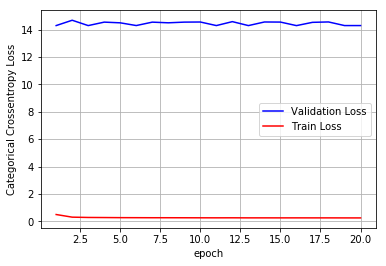

In [172]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
score15=score[0]
score16=score[1]
train_acc8=history32.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax32 = plt.subplots(1,1)
ax32.set_xlabel('epoch') ; ax32.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy32 = history32.history['val_loss']
ty32 = history32.history['loss']
plt_dynamic(x, vy32, ty32, ax32)

<h2>3.3 MLP + Dropout + AdamOptimizer</h2>

In [0]:
from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(270, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(74, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(24, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [174]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history33 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 350us/step - loss: 2.1407 - acc: 0.3129 - val_loss: 1.0587 - val_acc: 0.8367
Epoch 2/20
60000/60000 [==============================] - 15s 247us/step - loss: 1.6056 - acc: 0.4417 - val_loss: 0.9685 - val_acc: 0.8374
Epoch 3/20
60000/60000 [==============================] - 15s 258us/step - loss: 1.5861 - acc: 0.4489 - val_loss: 0.9560 - val_acc: 0.8435
Epoch 4/20
60000/60000 [==============================] - 15s 248us/step - loss: 1.5935 - acc: 0.4481 - val_loss: 0.9563 - val_acc: 0.8425
Epoch 5/20
60000/60000 [==============================] - 15s 249us/step - loss: 1.5843 - acc: 0.4502 - val_loss: 0.9460 - val_acc: 0.8454
Epoch 6/20
60000/60000 [==============================] - 15s 246us/step - loss: 1.5835 - acc: 0.4515 - val_loss: 0.9426 - val_acc: 0.8443
Epoch 7/20
60000/60000 [==============================] - 15s 257us/step - loss: 1.5749 - acc: 0.4514 - val_loss: 0.

In [175]:
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_46 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_21 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_22 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_23 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 784)               3136      
__________

Test score: 0.9321871797561645
Test accuracy: 0.8481


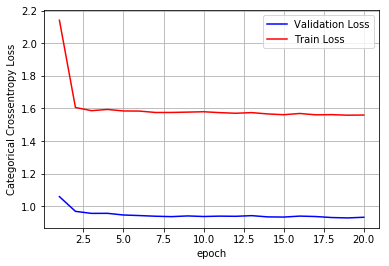

In [176]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history33.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy33 = history33.history['val_loss']
ty33 = history33.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

<h2>Observation:</h2>

In [177]:
from prettytable import PrettyTable
models=['2_hidden_layer MLP+ReLu+Adam',
        '2_hidden_layer MLP+Relu+adam+BN',
        '2_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '3_hidden_layer MLP+ReLu+Adam',
        '3_hidden_layer MLP+Relu+adam+BN',
        '3_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '5_hidden_layer MLP+ReLu+Adam',
        '5_hidden_layer MLP+Relu+adam+BN',
        '5_hidden_layer MLP+reLu+Adam+BN+Drop-out']

test_score=[score1,score3,score5,score7,score9,score11,score13,score15,
           score17]
test_accuracy=[score2,score4,score6,score8,score10,score12,score14,
              score16,
              score18]
INDEX = [1,2,3,4,5,6,7,8,9]
# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TEST ACCURACY",test_accuracy)
Model_Performance.add_column("TEST SCORE",test_score)

# Printing the Model_Performance
print(Model_Performance)

+--------+------------------------------------------+---------------+----------------------+
| INDEX. |                MODEL_NAME                | TEST ACCURACY |      TEST SCORE      |
+--------+------------------------------------------+---------------+----------------------+
|   1    |       2_hidden_layer MLP+ReLu+Adam       |     0.9805    | 0.08348324791224636  |
|   2    |     2_hidden_layer MLP+Relu+adam+BN      |     0.9795    | 0.08622472910828928  |
|   3    | 2_hidden_layer MLP+reLu+Adam+BN+Drop-out |     0.9831    | 0.056475996556773315 |
|   4    |       3_hidden_layer MLP+ReLu+Adam       |     0.9786    | 0.10880283313435166  |
|   5    |     3_hidden_layer MLP+Relu+adam+BN      |     0.8416    |  0.6937280797123909  |
|   6    | 3_hidden_layer MLP+reLu+Adam+BN+Drop-out |     0.8989    |  0.4045674772977829  |
|   7    |       5_hidden_layer MLP+ReLu+Adam       |     0.9831    | 0.08955217869340677  |
|   8    |     5_hidden_layer MLP+Relu+adam+BN      |     0.1136    | 